In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Required Datasets

In [3]:
dataset1=pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
dataset2=pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
dataset3=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
dataset4=pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\AditiGupta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [4]:
dataset1.shape

(1923515, 23)

In [5]:
dataset2.shape

(1872343, 23)

In [6]:
dataset3.shape

(2688710, 23)

In [7]:
dataset4.shape

(1456714, 23)

# Droping Null Values

In [8]:
dataset1=dataset1.dropna(how='any',axis=0)
dataset2=dataset2.dropna(how='any',axis=0)
dataset3=dataset3.dropna(how='any',axis=0)
dataset4=dataset4.dropna(how='any',axis=0)

In [9]:
dataset1.shape

(1205641, 23)

In [10]:
dataset2.shape

(1862832, 23)

In [11]:
dataset3.shape

(2658375, 23)

In [12]:
dataset4.shape

(1418365, 23)

#  Data Preprocessing
#  Count Number of Nans in column

In [13]:
print(dataset1.isnull().sum())

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [14]:
print(dataset2.isnull().sum())

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [15]:
print(dataset3.isnull().sum())

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [16]:
print(dataset4.isnull().sum())

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


# Filling Missing Values

In [17]:
dataset1['Location Description']=dataset1['Location Description'].fillna(dataset1['Location Description'].mode()[0])
dataset1['District']=dataset1['District'].fillna(dataset1['District'].mean())
dataset1['Ward']=dataset1['Ward'].fillna(dataset1['Ward'].mean())
dataset1['Location']=dataset1['Location'].fillna(dataset1['Location'].mode()[0])
dataset1['Community Area']=dataset1['Community Area'].fillna(dataset1['Community Area'].mode()[0])
dataset1['Latitude']=dataset1['Latitude'].fillna(dataset1['Latitude'].mode()[0])
dataset1['X Coordinate']=dataset1['X Coordinate'].fillna(dataset1['X Coordinate'].mode()[0])
dataset1['Y Coordinate']=dataset1['Y Coordinate'].fillna(dataset1['Y Coordinate'].mode()[0])

# Formatting data

In [18]:
dataset1.Date=pd.to_datetime(dataset1.Date,format='%m/%d/%Y %I:%M:%S %p')
dataset2.Date=pd.to_datetime(dataset2.Date,format='%m/%d/%Y %I:%M:%S %p')
dataset3.Date=pd.to_datetime(dataset3.Date,format='%m/%d/%Y %I:%M:%S %p')
dataset4.Date=pd.to_datetime(dataset4.Date,format='%m/%d/%Y %I:%M:%S %p')

# Setting Index To Date

In [19]:
dataset1.index=pd.DatetimeIndex(dataset1.Date)
dataset2.index=pd.DatetimeIndex(dataset2.Date)
dataset3.index=pd.DatetimeIndex(dataset3.Date)
dataset4.index=pd.DatetimeIndex(dataset4.Date)

# Adding Time Hour Grouping In Each Dataset

In [20]:
dataset1['time_hour']=dataset1['Date'].apply(lambda x: x.hour)
dataset1['month']=dataset1['Date'].apply(lambda x: x.month)
dataset1['year']=dataset1['Date'].apply(lambda x: x.year)


dataset2['time_hour']=dataset2['Date'].apply(lambda x: x.hour)
dataset2['month']=dataset2['Date'].apply(lambda x: x.month)
dataset2['year']=dataset2['Date'].apply(lambda x: x.year)


dataset3['time_hour']=dataset3['Date'].apply(lambda x: x.hour)
dataset3['month']=dataset3['Date'].apply(lambda x: x.month)
dataset3['year']=dataset3['Date'].apply(lambda x: x.year)


dataset4['time_hour']=dataset4['Date'].apply(lambda x: x.hour)
dataset4['month']=dataset4['Date'].apply(lambda x: x.month)
dataset4['year']=dataset4['Date'].apply(lambda x: x.year)

## Selecting the dataset only for year 2017 to have a understanding on the quality of data:

In [21]:
df=dataset4[dataset4['Year']==2017]

## It can be seen that the year 2017 dataset only have the data of january month that will lead to wrong Interpretation 

## Therefore removing the record for the year 2017 from dataset 4

In [22]:
dataset4=dataset4[dataset4['Year']!=2017]

# Analysis of Each Dataset By creating a Word Cloud

In [23]:
from wordcloud import WordCloud

# 1. On The Basis on Total Number Of Crimes Made 

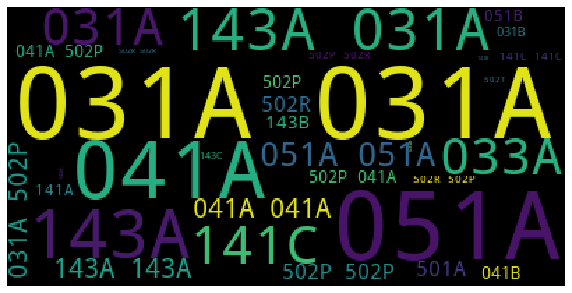

In [24]:
crime_code=" ".join(crime for crime in dataset1['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

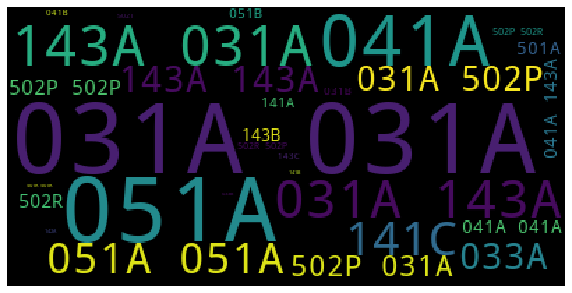

In [25]:
crime_code=" ".join(crime for crime in dataset2['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

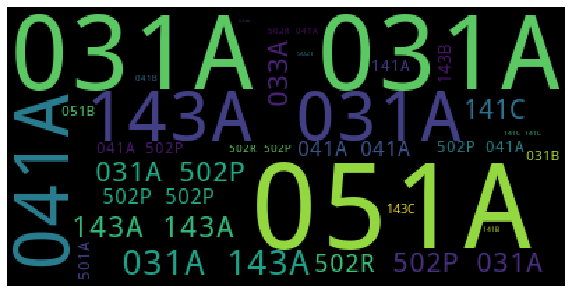

In [26]:
crime_code=" ".join(crime for crime in dataset3['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

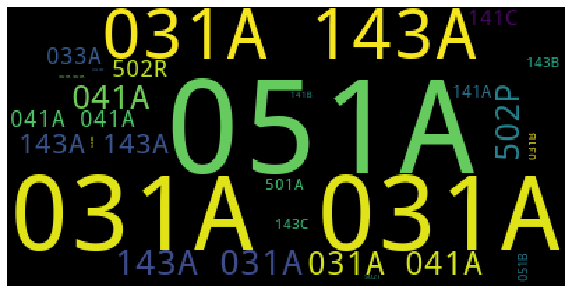

In [27]:
crime_code=" ".join(crime for crime in dataset4['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

# 2. On The Basis on Total Number Of Location of Crimes 

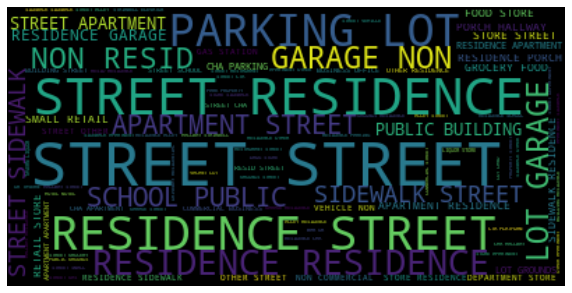

In [28]:
location_des=" ".join(i for i in dataset1['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

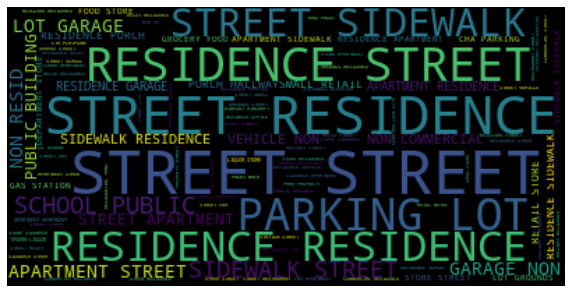

In [29]:
location_des=" ".join(i for i in dataset2['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

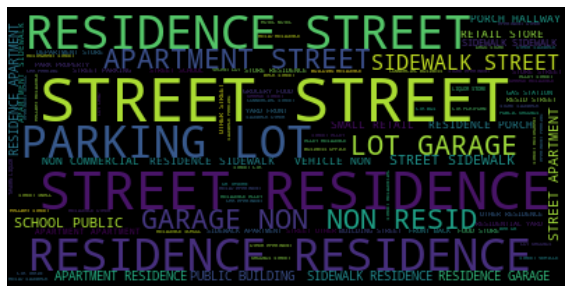

In [30]:
location_des=" ".join(i for i in dataset3['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

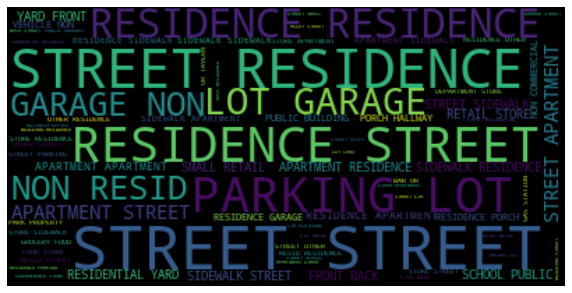

In [31]:
location_des=" ".join(i for i in dataset4['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# 3. On The Basis of Total number of Arrest Made

In [32]:
import seaborn as sns

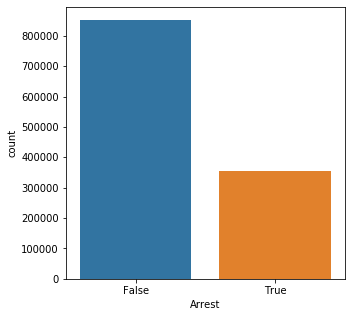

In [33]:
pd.value_counts(dataset1['Arrest'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='Arrest',data=dataset1,order=dataset1['Arrest'].value_counts().index)

# 4.On The basis of Frequent Crimes

# 5. Yearly count and comparison for crime

# 6. Monthly Analysis

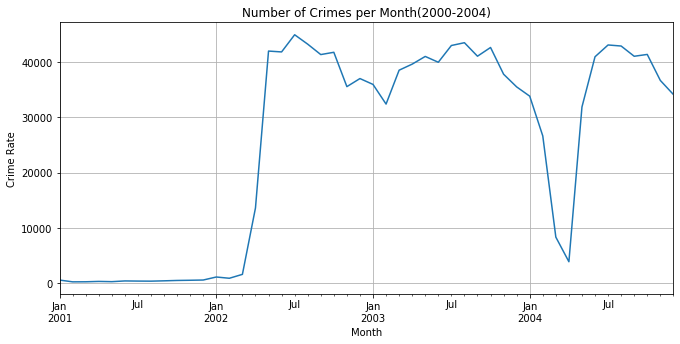

In [34]:
plt.figure(figsize=(11,5))
dataset1.resample('M').size().plot(legend=False,grid=True)
plt.title('Number of Crimes per Month(2000-2004)')
plt.xlabel('Month')
plt.ylabel('Crime Rate')
plt.show()

# 7. Individual Crime type Trend

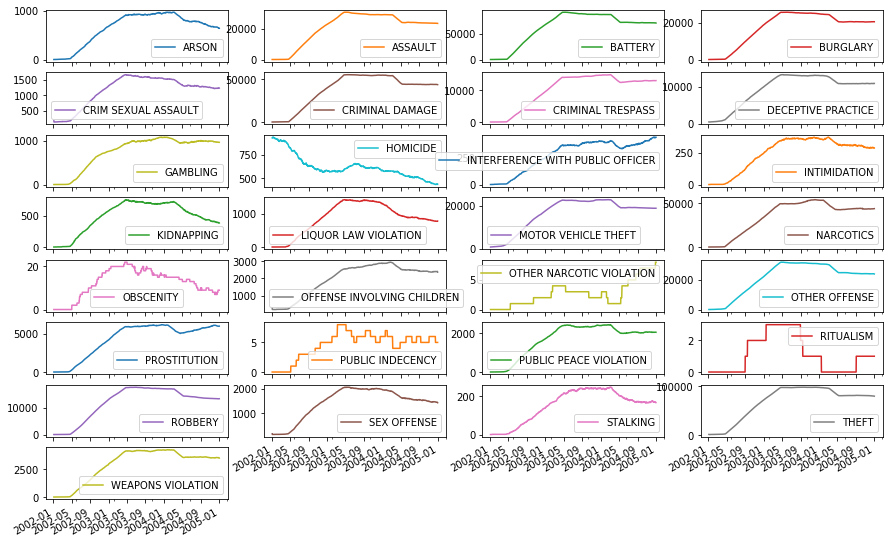

In [35]:
crime_p=dataset1.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=dataset1.index.date,fill_value=0)
plot=crime_p.rolling(365).sum().plot(figsize=(15,10),subplots=True,layout=(-1,4))